<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day_11_ML(ii)(Feature_scaling_GausianNB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# using social network ads

# Min max scalar-

gives value from 0 to 1

# standard Scaler

gives values from -1 to +1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/Social_Network_Ads.csv')

In [4]:
#sep x and y
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [6]:
#use freature scaling(standard scalar)(both + and -)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [7]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
x_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [9]:
#implemnt gaussian NB

from sklearn.naive_bayes import GaussianNB
g= GaussianNB()
g.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
#test with new results

print(g.predict(sc.transform([[20,87000]])))

[0]


In [11]:
y_pred=g.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9125

In [14]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[55  4]
 [ 3 18]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


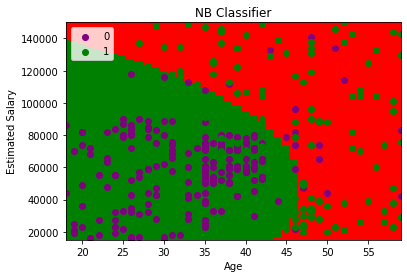

In [18]:
#Visualize the training set results

from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_train), y_train

x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 0 ),
                    np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 0))

plt.contourf(x1,x2, g.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             cmap = ListedColormap(('green', 'red')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())


for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j,1], c = ListedColormap(("purple", "green"))(i), label = j)

plt.title("NB Classifier")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()
